# Análise dos dados de filmes e séries da Netflix
Netflix é uma das plataformas de streaming de mídia e vídeo mais populares. Este conjunto de dados tabulares consiste em listas de todos os filmes e séries disponíveis na Netflix, juntamente com detalhes como elenco, diretores, classificações, ano de lançamento, duração, etc.

## Dicionário de dados
|CAMPO|DESCRIÇÃO|
|-|-|
|show_id|ID exclusivo para cada filme/programa de TV (série)|
|type|Identificador - um filme ou programa de TV (série)|
|title|Título do filme/programa de TV (série)|
|director|Diretor|
|cast|Atores envolvidos no filme/show|
|country|País onde foi produzido|
|date_added|Data em que foi adicionado à Netflix|
|release_year|Ano de lançamento real|
|rating|Classificação|
|duration|Duração Total - em minutos ou número de temporadas|
|listed_in|Gênero|
|description|Descrição|

## Entendimento dos dados


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
#Tamanho da amostra

df = pd.read_csv("netflix_titles.csv")
df.shape

(8807, 12)

In [57]:
#Tipagem dos dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [58]:
#Verificação qtde de nulos

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [59]:
#Exibir amostra de dados

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [60]:
# Análise dos dados nulos

df.loc[df["director"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [61]:
df.duration.unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [62]:
df.groupby(by=["type", "duration"]).count()

show_id  title  director  cast  country  date_added  \
type    duration                                                         
Movie   10 min           1      1         0     1        1           1   
        100 min        108    108       104    98      103         108   
        101 min        116    116       115   110      110         116   
        102 min        122    122       120   118      117         122   
        103 min        114    114       112   108      109         114   
...                    ...    ...       ...   ...      ...         ...   
TV Show 5 Seasons       65     65         6    65       64          64   
        6 Seasons       33     33         3    32       33          33   
        7 Seasons       23     23         1    23       22          23   
        8 Seasons       17     17         3    16       16          17   
        9 Seasons        9      9         3     9        8           9   

                   release_year  rating  listed_in  description  
type    duration                                                 
Movie   10 min                1       1          1            1  
        100 min             108     108        108          108  
        101 min             116     116        116          116  
        102 min             122     122        122          122  
        103 min             114     114        114          114  
...                         ...     ...        ...          ...  
TV Show 5 Seasons            65      65         65           65  
        6 Seasons            33      33         33           33  
        7 Seasons            23      23         23           23  
        8 Seasons            17      17         17           17  
        9 Seasons             9       9          9            9  

[220 rows x 10 columns]

## Preparação dos dados

In [63]:
#Correção no formato da data adicionada na Netflix (date_added).
df["date_added_aux"] = pd.to_datetime(df['date_added'])

#Criar coluna mês adicionada na Netflix a partir de (date_added).
df['month_added']=df['date_added_aux'].dt.month.astype('Int64')
df['month_name_added']=df['date_added_aux'].dt.month_name()

#Criar coluna ano adicionada na Netflix a partir de (date_added)
df['year_added'] = df['date_added_aux'].dt.year.astype('Int64')
df['year_added'].fillna(0, inplace=True)

df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_aux,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,9,September,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9,September,2021


In [96]:
#Correção do tipo para a duração (duration)
df['duration_aux'] = df['duration'].apply(lambda x: str(x).split(" ")[0])
df['duration_aux'] = df['duration_aux'].fillna(0)
df['duration_aux'] = df['duration_aux'].astype('Int64')

df.head(2)

ValueError: invalid literal for int() with base 10: 'nan'

In [65]:
#Ajuste para o quantitativo de diretores (director)

qtd_diretor = df["director"].str.get_dummies(', ').sum()

df_qtd_diretor = pd.DataFrame({'diretor':qtd_diretor.index, 'qtd':qtd_diretor.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_qtd_diretor

,diretor,qtd
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,16
...,...,...
4988,Jovanka Vuckovic,1
4989,Bradley Walsh,1
4990,Juan Antin,1
4991,Juan Antonio de la Riva,1


In [66]:
#Ajuste para o quantitativo de atores (cast)

qtd_ator = df['cast'].str.get_dummies(', ').sum()

df_qtd_ator = pd.DataFrame({'ator':qtd_ator.index, 'qtd':qtd_ator.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_qtd_ator

,ator,qtd
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
...,...,...
36434,Chinmay Kambli,1
36435,Kumiko Aso,1
36436,Kumarakom Vasudevan,1
36437,Kumar Varun,1


In [67]:
# Ajuste para o quantitativo de classificação do gênero (listed_in)

qtd_genero = df['listed_in'].str.get_dummies(', ').sum()

df_qtd_genero = pd.DataFrame({'genero':qtd_genero.index, 'qtd':qtd_genero.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_qtd_genero

,genero,qtd
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


In [68]:
#Preparação da descrição (description) para representação em WordCloud

In [69]:
#Segmentação entre filmes e séries


## Análise Exploratória dos Dados - EDA
- Quantidade por tipo?
- Quantidade por ano?
- Quais são as séries mais atuais e as mais antigas?
- Qual filme e série possuem maior duração de tempo?
- Qual classificação de filme ou série aparece mais?
- Qual o país com a maior quantidade de filmes e séries?

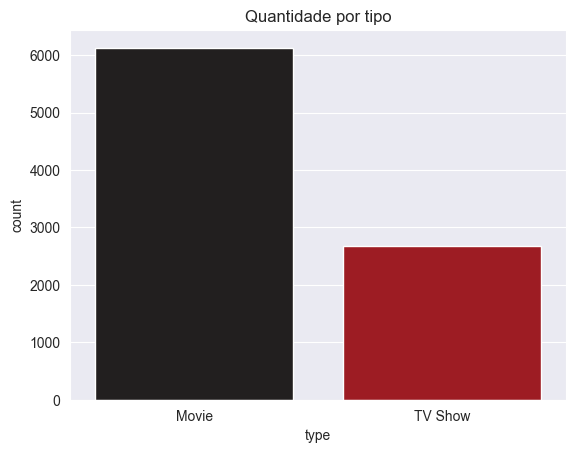

In [73]:
#Quantidade por tipo?

sns.countplot(data=df, x="type")
plt.title("Quantidade por tipo")
plt.show()

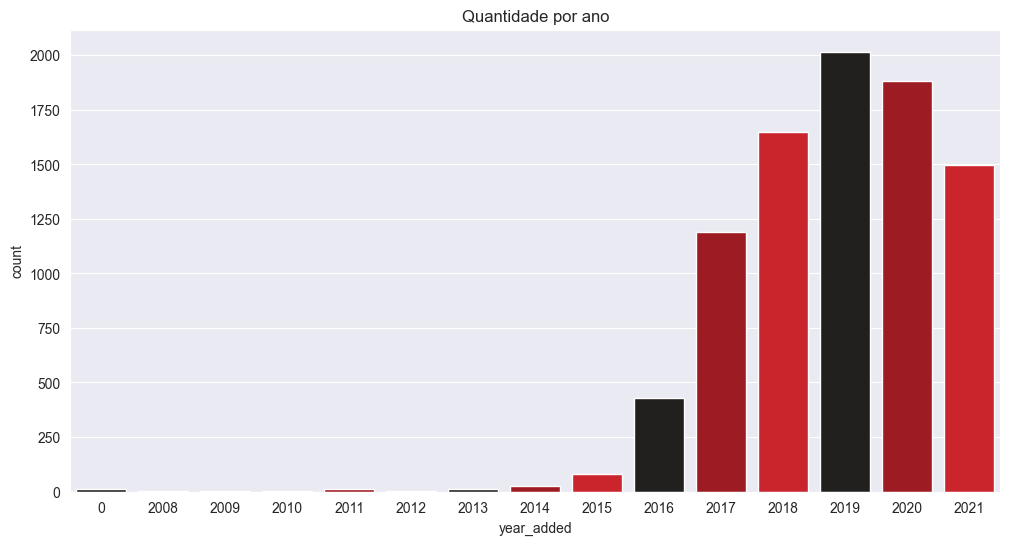

In [71]:
#Quantidade por ano?

paleta_netflix=['#221f1f', '#b20710', '#e50914']
sns.set_palette(paleta_netflix)
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="year_added", palette=paleta_netflix)
plt.title("Quantidade por ano")
plt.show()

In [111]:
#Quais são as séries mais atuais e as mais antigas?

#Mais antigos
df[["title", "year_added"]].sort_values(by="year_added", ascending=True)[:10]

,title,year_added
7196,Kikoriki,0
7254,La Familia P. Luche,0
6174,Anthony Bourdain: Parts Unknown,0
6901,Gunslinger Girl,0
6795,Frasier,0
6066,A Young Doctor's Notebook and Other Stories,0
7847,Red vs. Blue,0
6806,Friends,0
8182,The Adventures of Figaro Pho,0
7406,Maron,0


In [82]:
#Quais são as séries mais atuais e as mais antigas?

#Mais recentes
df[["title", "year_added"]].sort_values(by="year_added", ascending=False)[:10]

,title,year_added
0,Dick Johnson Is Dead,2021
996,HOMUNCULUS,2021
1005,Keymon and Nani in Space Adventure,2021
1004,Izzy's Koala World,2021
1003,Zero,2021
1002,Tell Me When,2021
1001,Oloibiri,2021
1000,Wild Dog,2021
999,Stowaway,2021
998,Searching For Sheela,2021


In [83]:
#Qual filme e série possuem maior duração de tempo?

#Menor duração
df[["title", "type", "duration_aux"]].sort_values(by="duration_aux", ascending=True)[:10]

,title,type,duration_aux
4403,Medal of Honor,TV Show,1
1790,Blood of Zeus,TV Show,1
5000,Flint Town,TV Show,1
4997,Borderliner,TV Show,1
4994,Bad Guys: Vile City,TV Show,1
1794,The Devil Punisher,TV Show,1
4992,Collateral,TV Show,1
5004,21 Thunder,TV Show,1
4991,A.I.C.O.,TV Show,1
1800,Move,TV Show,1


In [84]:
#Qual filme e série possuem maior duração de tempo?

#Maior duração
df[["title", "type", "duration_aux"]].sort_values(by="duration_aux", ascending=False)[:10]

,title,type,duration_aux
5813,Louis C.K.: Live at the Comedy Store,Movie,nan
5541,Louis C.K. 2017,Movie,nan
5794,Louis C.K.: Hilarious,Movie,nan
6915,Hangman,Movie,99
802,Ninja Assassin,Movie,99
877,Cinema Bandi,Movie,99
7369,Mad Money,Movie,99
858,678,Movie,99
7304,Like Arrows,Movie,99
6069,A.X.L.,Movie,99


In [99]:
#Qual o país com a maior quantidade de filmes e séries?

df["country"].value_counts().sort_values(ascending=False)[:10]

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

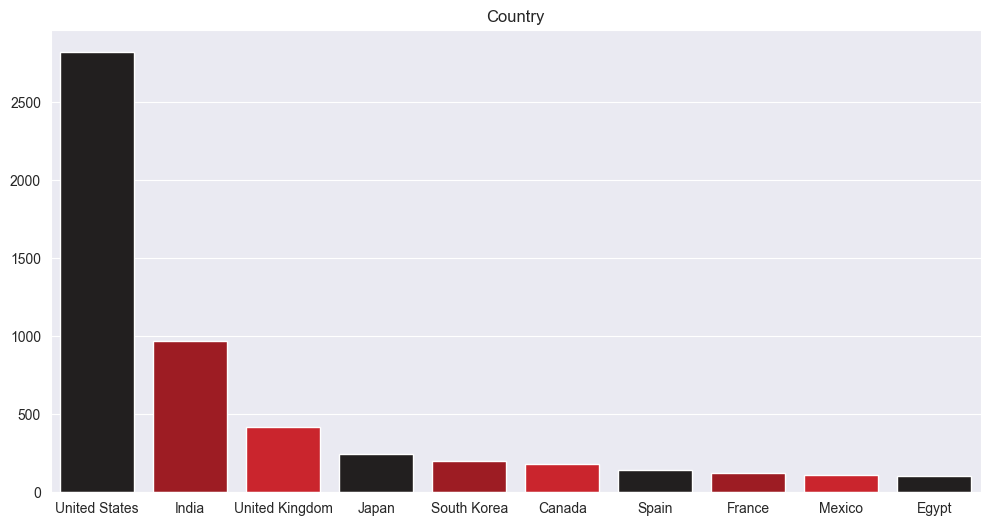

In [102]:
#Qual o país com a maior quantidade de filmes e séries?

plt.figure(figsize=(12,6))
sns.barplot(x=df["country"].value_counts().sort_values(ascending=False)[:10].index, y=df["country"].value_counts().sort_values(ascending=False)[:10].values, palette=paleta_netflix)
plt.title("Country")
plt.show()

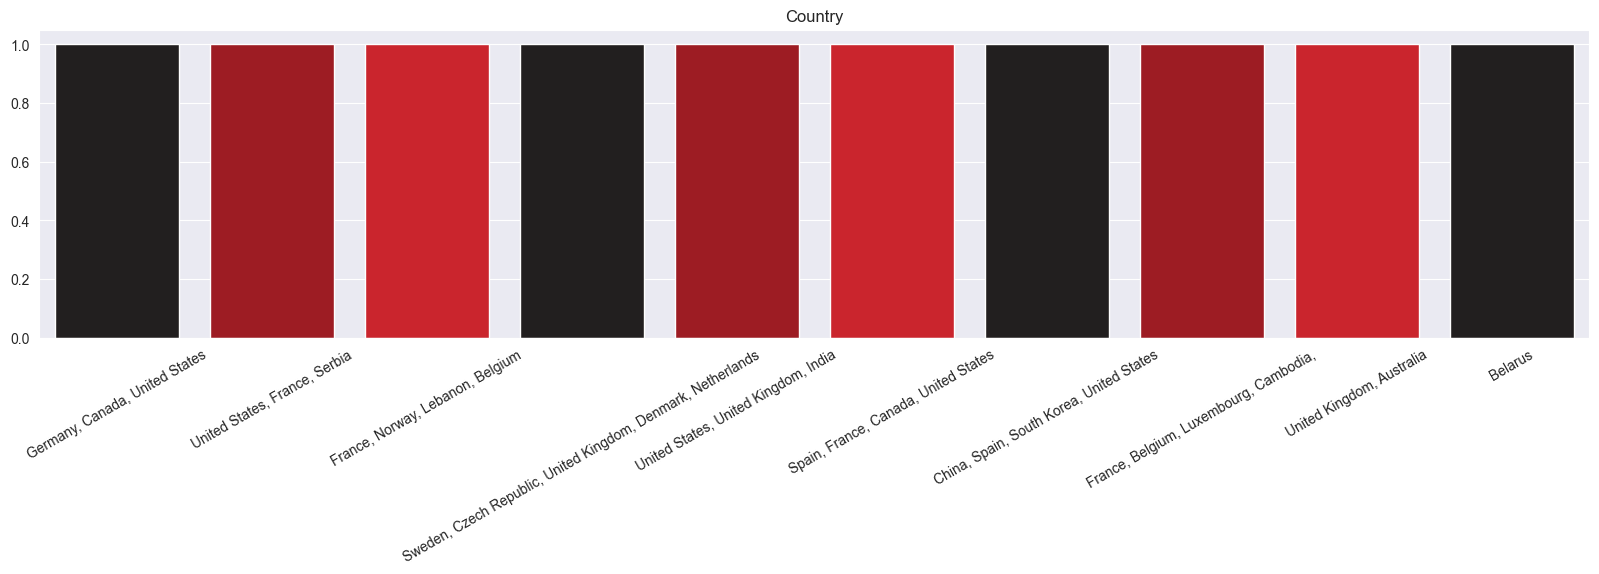

In [113]:
#Qual o país com a menor quantidade de filmes e séries?

plt.figure(figsize=(20,4))
sns.barplot(x=df["country"].value_counts().sort_values(ascending=True)[:10].index, y=df["country"].value_counts().sort_values(ascending=True)[:10].values, palette=paleta_netflix)
plt.title("Country")
plt.xticks(rotation=30)
plt.show()